# Import Statements

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics, tree

# Data Processing

In [70]:
dataset_path = "./dataset"
title_basics_filename = "title.basics.tsv"
title_ratings_filename = "title.ratings.tsv"
movies_basics_filename = "movies.basics.tsv"
movies_basics_genres_filename = "movies.basics.genres.tsv"
movies_rated_filename = "movies.rated.tsv"
title_basics_path = f"{dataset_path}/{title_basics_filename}"
title_ratings_path = f"{dataset_path}/{title_ratings_filename}"
movies_basics_path = f"{dataset_path}/{movies_basics_filename}"
movies_basics_genres_path = f"{dataset_path}/{movies_basics_genres_filename}"
movies_rated_path = f"{dataset_path}/{movies_rated_filename}"

In [52]:
title_ratings = pd.read_table(title_ratings_path)
title_basics = pd.read_table(title_basics_path)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
min_rating = 7.5
min_num_votes = 200
valid_movies_ratings = title_ratings.loc[(title_ratings["averageRating"] > min_rating) & (title_ratings["numVotes"] > min_num_votes)]
valid_movies_id = valid_movies_ratings["tconst"].values.tolist()
print(len(valid_movies_id))

75051


In [54]:
print(valid_movies_ratings.keys())
print(title_basics.keys())

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


In [57]:
movies_basics = pd.merge(valid_movies_ratings, title_basics, on="tconst")


In [64]:
raw_genres = movies_basics["genres"].values.tolist()
genres = set()
for rg in raw_genres:
    g_list = rg.split(",")
    for g in g_list:
        genres.add(g)

genres.remove("\\N")
print(genres)

{'Family', 'Drama', 'Adult', 'Horror', 'Short', 'Music', 'Sport', 'Crime', 'Animation', 'War', 'Game-Show', 'Film-Noir', 'Talk-Show', 'History', 'Sci-Fi', 'Action', 'News', 'Comedy', 'Musical', 'Reality-TV', 'Mystery', 'Romance', 'Western', 'Fantasy', 'Thriller', 'Biography', 'Adventure', 'Documentary'}


In [65]:
genres = list(genres)
movies_basics[genres] = pd.DataFrame([[False]*len(genres)], index=movies_basics.index)

In [66]:
movies_basics.to_csv(movies_basics_path, sep="\t")

In [68]:
movies_basics = pd.read_table(movies_basics_path)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
for g in genres:
    movies_basics.loc[(movies_basics["genres"].str.contains(g)), g] = True

# print(valid_movies_basics)
movies_basics.to_csv(movies_basics_genres_path, sep="\t")

In [138]:
movies_rated = pd.read_table(movies_rated_path, sep="\t")
movies_rated

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,numVotes,titleType,primaryTitle,originalTitle,Score,isAdult,startYear,endYear,runtimeMinutes,...,Musical,Reality-TV,Mystery,Romance,Western,Fantasy,Thriller,Biography,Adventure,Documentary
0,0,2693284,movie,The Shawshank Redemption,The Shawshank Redemption,4.0,0,1994,\N,142,...,False,False,False,False,False,False,False,False,False,False
1,1,2667091,movie,The Dark Knight,The Dark Knight,5.0,0,2008,\N,152,...,False,False,False,False,False,False,False,False,False,False
2,2,2365937,movie,Inception,Inception,5.0,0,2010,\N,148,...,False,False,False,False,False,False,False,False,True,False
3,3,2138751,movie,Fight Club,Fight Club,5.0,0,1999,\N,139,...,False,False,False,False,False,False,False,False,False,False
4,4,2115531,tvSeries,Game of Thrones,Game of Thrones,5.0,0,2011,2019,57,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75046,75046,201,tvEpisode,Enter the Lost Galaxy,Enter the Lost Galaxy,NaN,0,1999,\N,21,...,False,False,False,False,False,False,False,False,True,False
75047,75047,201,tvSeries,Mitsuteru yokoyama's sangokushi,Mitsuteru yokoyama's sangokushi,NaN,0,1991,1992,28,...,False,False,False,False,False,False,False,False,False,False
75048,75048,201,tvEpisode,Gotta Finish the Riff,Gotta Finish the Riff,NaN,0,1987,\N,47,...,False,False,True,False,False,False,False,False,False,False
75049,75049,201,tvMovie,Diplomatix,Diplomatix,NaN,0,1985,\N,32,...,False,False,False,False,False,False,False,False,False,False


In [139]:
# movies_rated.drop(movies_rated.columns[[0]], axis=1, inplace=True)

movies_rated.to_csv(movies_rated_path, sep="\t")
movies_rated

,numVotes,titleType,primaryTitle,originalTitle,Score,isAdult,startYear,endYear,runtimeMinutes,genres,...,Musical,Reality-TV,Mystery,Romance,Western,Fantasy,Thriller,Biography,Adventure,Documentary
0,2693284,movie,The Shawshank Redemption,The Shawshank Redemption,4.0,0,1994,\N,142,Drama,...,False,False,False,False,False,False,False,False,False,False
1,2667091,movie,The Dark Knight,The Dark Knight,5.0,0,2008,\N,152,"Action,Crime,Drama",...,False,False,False,False,False,False,False,False,False,False
2,2365937,movie,Inception,Inception,5.0,0,2010,\N,148,"Action,Adventure,Sci-Fi",...,False,False,False,False,False,False,False,False,True,False
3,2138751,movie,Fight Club,Fight Club,5.0,0,1999,\N,139,Drama,...,False,False,False,False,False,False,False,False,False,False
4,2115531,tvSeries,Game of Thrones,Game of Thrones,5.0,0,2011,2019,57,"Action,Adventure,Drama",...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75046,201,tvEpisode,Enter the Lost Galaxy,Enter the Lost Galaxy,NaN,0,1999,\N,21,"Action,Adventure,Family",...,False,False,False,False,False,False,False,False,True,False
75047,201,tvSeries,Mitsuteru yokoyama's sangokushi,Mitsuteru yokoyama's sangokushi,NaN,0,1991,1992,28,"Action,Animation,Drama",...,False,False,False,False,False,False,False,False,False,False
75048,201,tvEpisode,Gotta Finish the Riff,Gotta Finish the Riff,NaN,0,1987,\N,47,"Crime,Drama,Mystery",...,False,False,True,False,False,False,False,False,False,False
75049,201,tvMovie,Diplomatix,Diplomatix,NaN,0,1985,\N,32,Comedy,...,False,False,False,False,False,False,False,False,False,False


In [140]:
movies_rated["Type"] = 2
movies_rated.loc[(movies_rated["titleType"] == "movie"), "Type"] = 0
movies_rated.loc[(movies_rated["titleType"] == "tvSeries"), "Type"] = 1
movies_rated

,numVotes,titleType,primaryTitle,originalTitle,Score,isAdult,startYear,endYear,runtimeMinutes,genres,...,Reality-TV,Mystery,Romance,Western,Fantasy,Thriller,Biography,Adventure,Documentary,Type
0,2693284,movie,The Shawshank Redemption,The Shawshank Redemption,4.0,0,1994,\N,142,Drama,...,False,False,False,False,False,False,False,False,False,0
1,2667091,movie,The Dark Knight,The Dark Knight,5.0,0,2008,\N,152,"Action,Crime,Drama",...,False,False,False,False,False,False,False,False,False,0
2,2365937,movie,Inception,Inception,5.0,0,2010,\N,148,"Action,Adventure,Sci-Fi",...,False,False,False,False,False,False,False,True,False,0
3,2138751,movie,Fight Club,Fight Club,5.0,0,1999,\N,139,Drama,...,False,False,False,False,False,False,False,False,False,0
4,2115531,tvSeries,Game of Thrones,Game of Thrones,5.0,0,2011,2019,57,"Action,Adventure,Drama",...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75046,201,tvEpisode,Enter the Lost Galaxy,Enter the Lost Galaxy,NaN,0,1999,\N,21,"Action,Adventure,Family",...,False,False,False,False,False,False,False,True,False,2
75047,201,tvSeries,Mitsuteru yokoyama's sangokushi,Mitsuteru yokoyama's sangokushi,NaN,0,1991,1992,28,"Action,Animation,Drama",...,False,False,False,False,False,False,False,False,False,1
75048,201,tvEpisode,Gotta Finish the Riff,Gotta Finish the Riff,NaN,0,1987,\N,47,"Crime,Drama,Mystery",...,False,True,False,False,False,False,False,False,False,2
75049,201,tvMovie,Diplomatix,Diplomatix,NaN,0,1985,\N,32,Comedy,...,False,False,False,False,False,False,False,False,False,2


In [141]:
SCORE = "Score"

In [142]:
feature_cols = ["numVotes", "Type"]
feature_cols.extend(genres)

print(feature_cols)
training_data = movies_rated[~movies_rated[SCORE].isna()]
test_data = movies_rated[movies_rated[SCORE].isna()]

X_train = training_data[feature_cols]
y_train = training_data[SCORE]

X_test = test_data[feature_cols]
y_train


['numVotes', 'Type', 'Family', 'Drama', 'Adult', 'Horror', 'Short', 'Music', 'Sport', 'Crime', 'Animation', 'War', 'Game-Show', 'Film-Noir', 'Talk-Show', 'History', 'Sci-Fi', 'Action', 'News', 'Comedy', 'Musical', 'Reality-TV', 'Mystery', 'Romance', 'Western', 'Fantasy', 'Thriller', 'Biography', 'Adventure', 'Documentary']


0      4.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
647    4.0
653    4.0
684    4.0
742    3.0
768    2.0
Name: Score, Length: 81, dtype: float64

# Apply Model

## Tree

In [143]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [144]:
y_pred

array([4., 4., 4., ..., 2., 2., 2.])

In [148]:
pred_test_data = test_data
pred_test_data[SCORE] = y_pred
pred_test_data

pred_test_data.to_csv("./dataset/movies.pred.tsv", sep="\t")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1551614.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 459448.00
|   |   |   |--- feature_0 <= 355514.50
|   |   |   |   |--- feature_0 <= 308102.50
|   |   |   |   |   |--- feature_0 <= 124191.00
|   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- feature_0 >  124191.00
|   |   |   |   |   |   |--- feature_0 <= 213871.50
|   |   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |   |--- feature_26 >  0.50
|   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |--- feature_0 >  213871.50
|   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- feature_0 >  308102.50
|   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |--- feature_10 > 

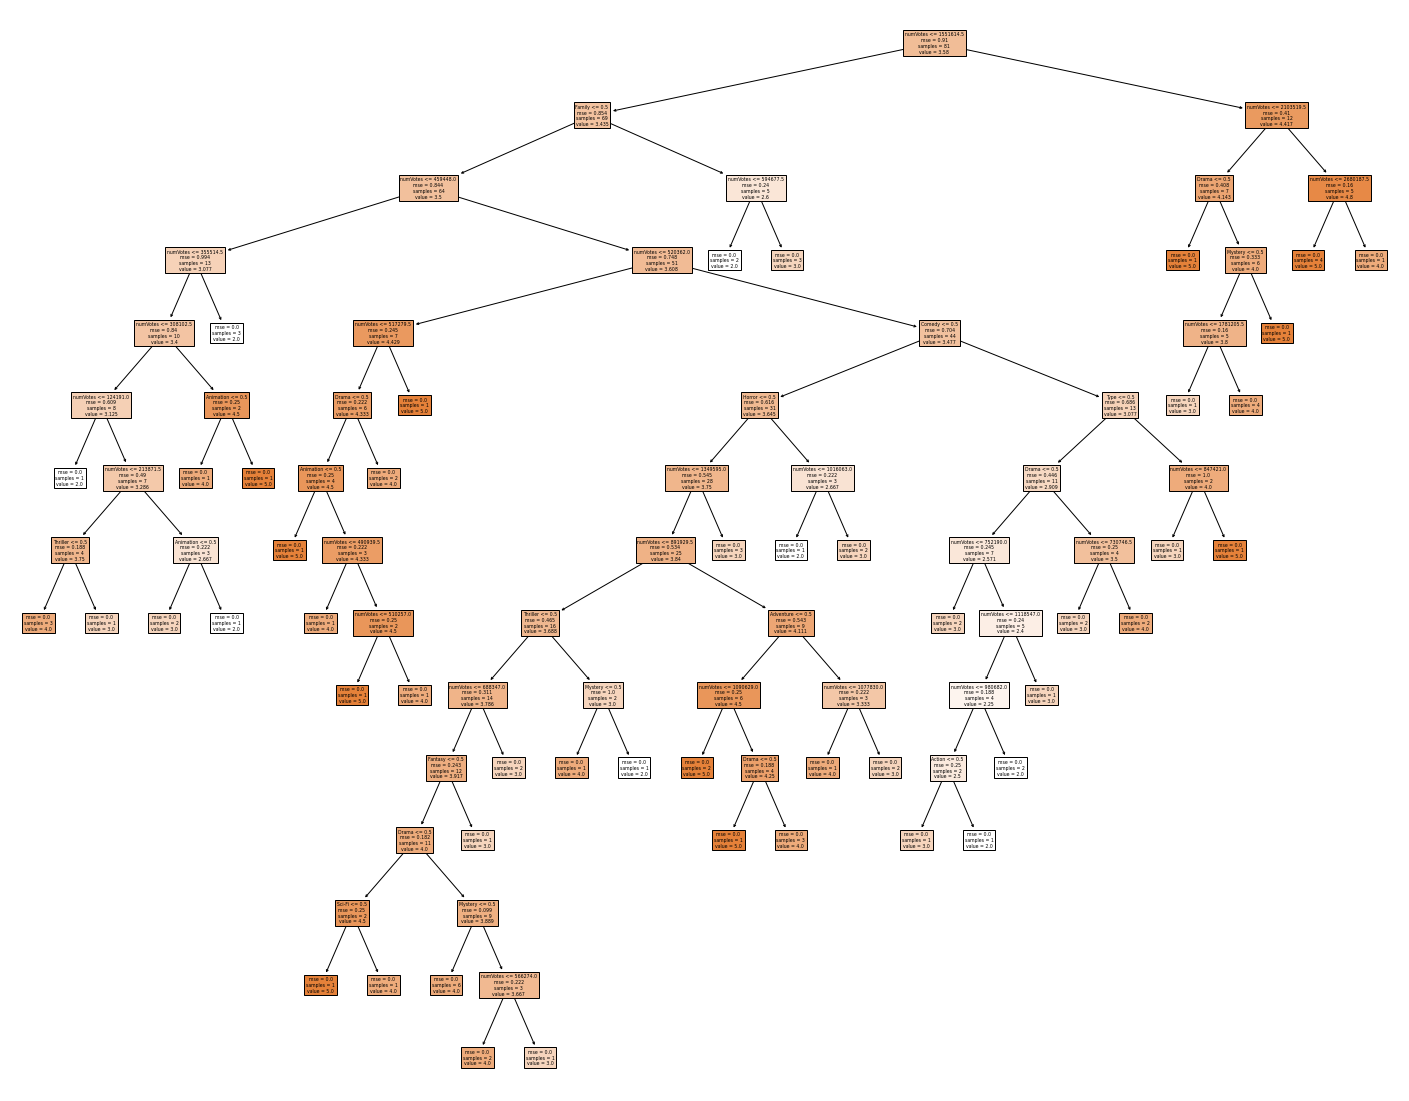

In [146]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=feature_cols, filled=True)